In [24]:
import pandas as pd


db = pd.read_csv('datos.csv')
db.head()

db['Año'] = pd.to_datetime(db['Año'], format='%Y')
db['Año'] = db['Año'].dt.year

db = db[['ID', 'Año', 'Pais', 'Data']]

#set the id NaN as the first three letters of Pais
db['ID'] = db['ID'].fillna(db['Pais'].str[:3].str.upper())



#split the data in two dataframes
db_practica = db[db['Año'] <= 2010]
db_practica = db_practica[['ID', 'Año', 'Data']]
db_practica = db_practica.reset_index(drop=True)

db_test = db[db['Año'] > 2010]
db_test = db_test[['ID', 'Año', 'Data']]
db_test = db_test.reset_index(drop=True)

db_test




,ID,Año,Data
0,ALB,2012,0.620691
1,ALB,2014,1.023101
2,ALB,2015,0.096067
3,ALB,2016,0.139303
4,ALB,2017,0.392570
...,...,...,...
1086,ZMB,2015,60.793095
1087,ZMB,2022,64.349754
1088,ZWE,2011,21.580063
1089,ZWE,2017,34.206043


Mean squared error:  403.6449005720233


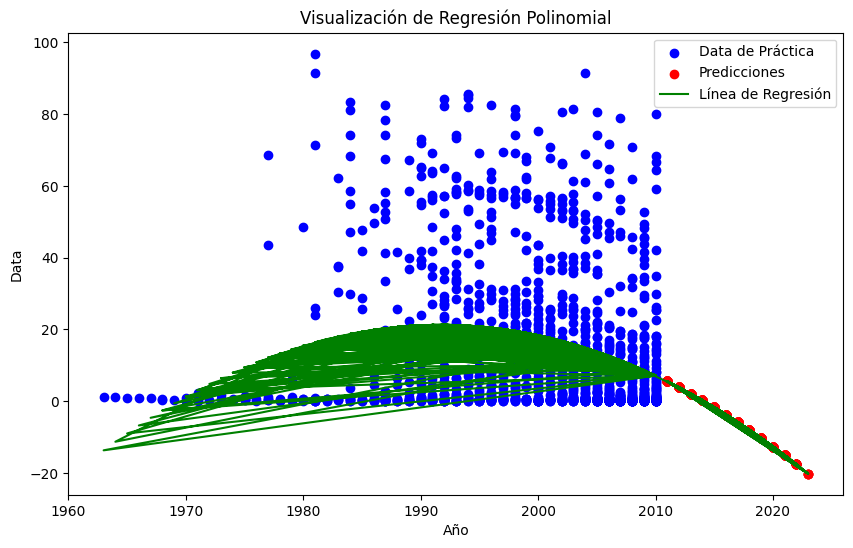

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Configuración inicial, suponiendo que db_practica y db_test ya están definidos
X = db_practica['Año'].values.reshape(-1,1)
y = db_practica['Data'].values

# División de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transformación polinomial
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Entrenamiento del modelo
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predicción y evaluación en el conjunto de prueba
y_pred = model.predict(X_test_poly)
print('Mean squared error: ', mean_squared_error(y_test, y_pred))

# Preparar datos de prueba final para predicción
X_final_test = db_test['Año'].values.reshape(-1,1)
X_final_test_poly = poly.transform(X_final_test)
y_final_pred = model.predict(X_final_test_poly)
db_test['Data'] = y_final_pred
db_test.to_csv('datos_prediccion.csv', index=False)

# Visualización de los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Data de Práctica')
plt.scatter(X_final_test, y_final_pred, color='red', label='Predicciones')
X_full = np.vstack((X_train, X_final_test))  # Uniendo todos los años para la línea de predicción
X_full_poly = poly.transform(X_full)
plt.plot(X_full, model.predict(X_full_poly), color='green', label='Línea de Regresión')
plt.xlabel('Año')
plt.ylabel('Data')
plt.title('Visualización de Regresión Polinomial')
plt.legend()
plt.show()


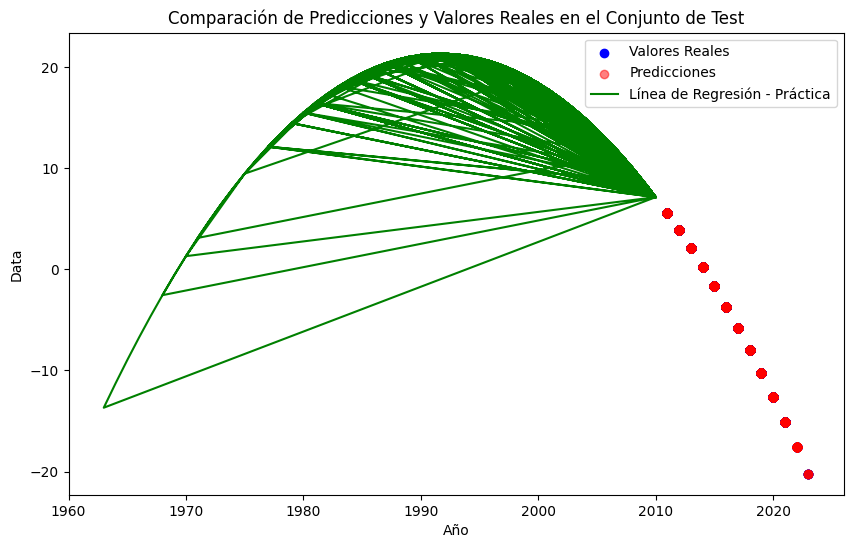

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(db_test['Año'], db_test['Data'], color='blue', label='Valores Reales')
plt.scatter(db_test['Año'], db_test['Data'], color='red', alpha=0.5, label='Predicciones')
plt.plot(db_practica['Año'], model.predict(poly.transform(db_practica['Año'].values.reshape(-1, 1))), color='green', label='Línea de Regresión - Práctica')
plt.xlabel('Año')
plt.ylabel('Data')
plt.title('Comparación de Predicciones y Valores Reales en el Conjunto de Test')
plt.legend()
plt.show()
